In [ ]:
from google.colab import drive
drive.mount('/content/GoogleDrive')

Drive already mounted at /content/GoogleDrive; to attempt to forcibly remount, call drive.mount("/content/GoogleDrive", force_remount=True).


In [ ]:
import pandas as pd
data_original = pd.read_csv(r"/content/GoogleDrive/MyDrive/Colab Notebooks/Tracks/Chevron/Train/training.csv")
data_original.shape

(29692, 31)

In [ ]:
data_original.head()

,Unnamed: 0,surface_x,surface_y,bh_x,bh_y,standardized_operator_name,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,ffs_frac_type,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,average_frac_fluid_per_stage,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,pad_id,relative_well_position,batch_frac_classification,well_family_relationship,frac_type,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
0,0,1383493.751,717329.2368,1382854.564,712767.3700,1121,3963.582677,NaN,76000.0000,NaN,8712.598425,NaN,19.174572,NaN,NaN,NaN,NaN,NaN,NaN,1.0,102604,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383030.678,714796.3610,1382668.912,712798.4321,46.623023
1,1,1380344.035,711916.2732,1379738.429,707860.5643,1022,3179.133858,NaN,113000.0000,5.610964e+05,8627.952756,NaN,35.544272,176.493480,NaN,NaN,NaN,0.201391,4.965455,1.0,108497,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379965.126,709541.7145,1379630.025,707907.6708,59.750009
2,2,1379915.895,717845.0063,1379274.644,713471.9952,1304,3810.039370,12.0,286571.4286,1.621424e+06,8801.181102,NaN,75.214821,425.566078,317.503281,23880.952380,135118.62610,0.176741,5.658008,1.0,108526,Standalone Well,Non-Batch Frac,Standalone Well,Primary Frac,92.0,1379357.250,715381.2327,1378960.372,713530.4490,10.785716
3,3,1383567.443,706640.2010,1382891.477,702068.3838,1022,3723.425197,11.0,106878.9286,4.377134e+05,8635.826772,NaN,28.704465,117.556659,338.493200,9716.266234,39792.12953,0.244176,4.095414,1.0,105631,Standalone Well,Unknown,Standalone Well,Primary Frac,NaN,1383099.610,704058.8508,1382727.299,702098.4882,123.797638
4,4,1378962.585,702623.9787,1379643.546,707204.9131,1022,3811.023622,NaN,112789.7143,6.229802e+05,8664.370079,NaN,29.595648,163.467933,NaN,NaN,NaN,0.181049,5.523377,1.0,103717,Outer Well,Unknown,Infill Child Well,Primary Frac,NaN,1379546.414,705150.7519,1379987.487,707123.7258,102.309540


In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29692 entries, 0 to 29691
Data columns (total 31 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Unnamed: 0                    29692 non-null  int64  
 1   surface_x                     29692 non-null  float64
 2   surface_y                     29692 non-null  float64
 3   bh_x                          27605 non-null  float64
 4   bh_y                          27605 non-null  float64
 5   standardized_operator_name    29692 non-null  int64  
 6   gross_perforated_length       22135 non-null  float64
 7   number_of_stages              2752 non-null   float64
 8   total_proppant                19080 non-null  float64
 9   total_fluid                   19076 non-null  float64
 10  true_vertical_depth           28197 non-null  float64
 11  ffs_frac_type                 14585 non-null  object 
 12  proppant_intensity            18971 non-null  float64
 13  f

In [ ]:
data_original.drop(["Unnamed: 0", "frac_type", "standardized_operator_name", "pad_id"], axis=1, inplace=True)

In [ ]:
data_original.columns

Index(['surface_x', 'surface_y', 'bh_x', 'bh_y', 'gross_perforated_length',
       'number_of_stages', 'total_proppant', 'total_fluid',
       'true_vertical_depth', 'ffs_frac_type', 'proppant_intensity',
       'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'relative_well_position',
       'batch_frac_classification', 'well_family_relationship',
       'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'],
      dtype='object')

Remove those rows without values

In [ ]:
data_original.dropna(subset=["bh_x", 'bh_y', 'gross_perforated_length', 'number_of_stages', 'total_proppant',
       'total_fluid', 'true_vertical_depth', 'ffs_frac_type',
       'proppant_intensity', 'frac_fluid_intensity', 'average_stage_length',
       'average_proppant_per_stage', 'average_frac_fluid_per_stage',
       'proppant_to_frac_fluid_ratio', 'frac_fluid_to_proppant_ratio',
       'bin_lateral_length', 'frac_seasoning', 'horizontal_midpoint_x', 'horizontal_midpoint_y',
       'horizontal_toe_x', 'horizontal_toe_y', 'OilPeakRate'], inplace=True)

In [ ]:
data_original.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1983 entries, 344 to 29431
Data columns (total 27 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   surface_x                     1983 non-null   float64
 1   surface_y                     1983 non-null   float64
 2   bh_x                          1983 non-null   float64
 3   bh_y                          1983 non-null   float64
 4   gross_perforated_length       1983 non-null   float64
 5   number_of_stages              1983 non-null   float64
 6   total_proppant                1983 non-null   float64
 7   total_fluid                   1983 non-null   float64
 8   true_vertical_depth           1983 non-null   float64
 9   ffs_frac_type                 1983 non-null   object 
 10  proppant_intensity            1983 non-null   float64
 11  frac_fluid_intensity          1983 non-null   float64
 12  average_stage_length          1983 non-null   float64
 13  

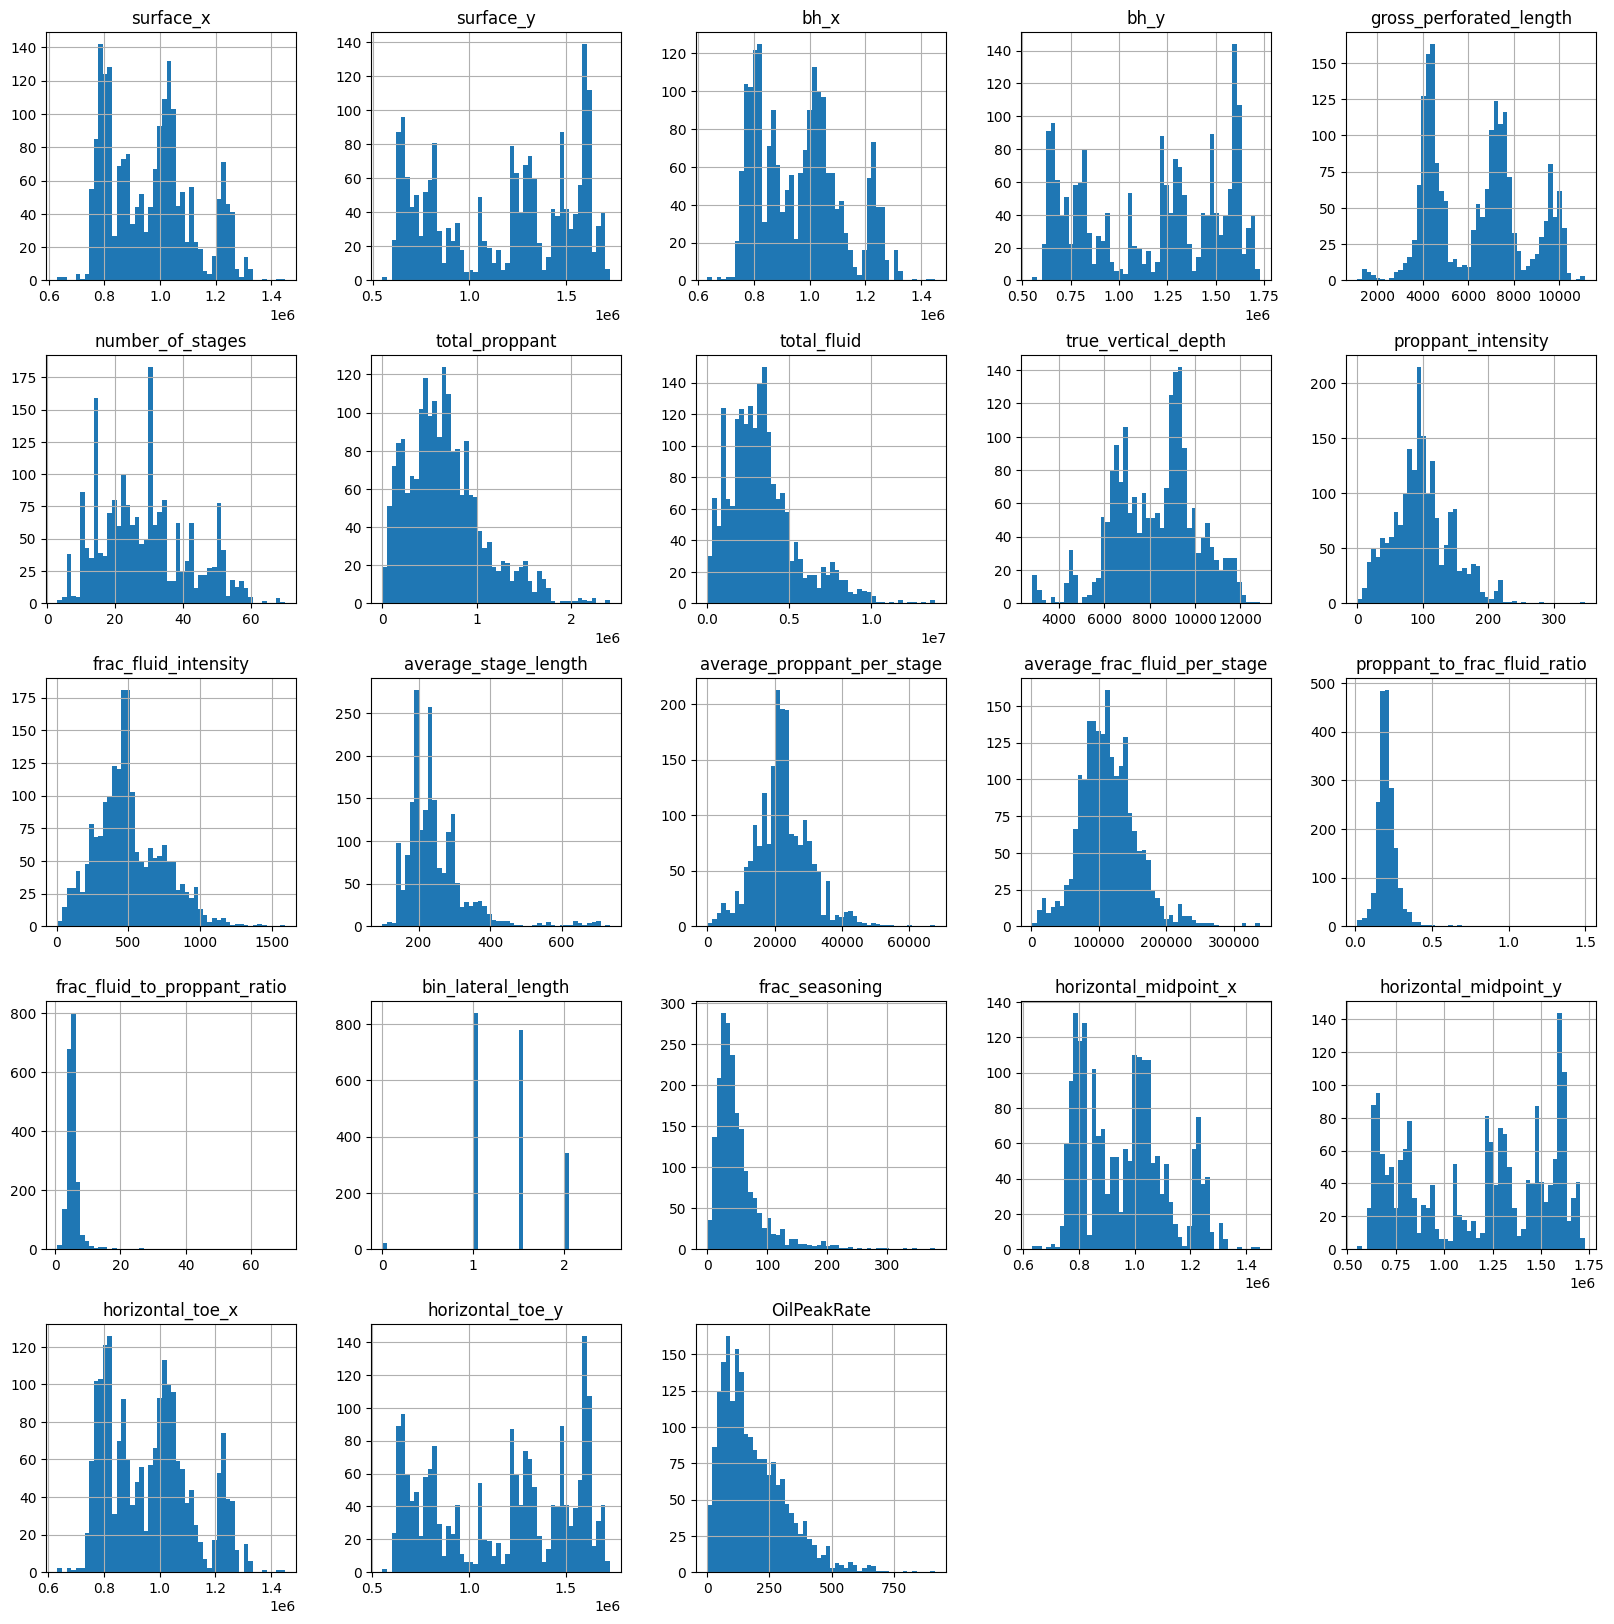

In [ ]:
import matplotlib.pyplot as plt
data_original.hist(bins=50, figsize=(20,20))
plt.show()

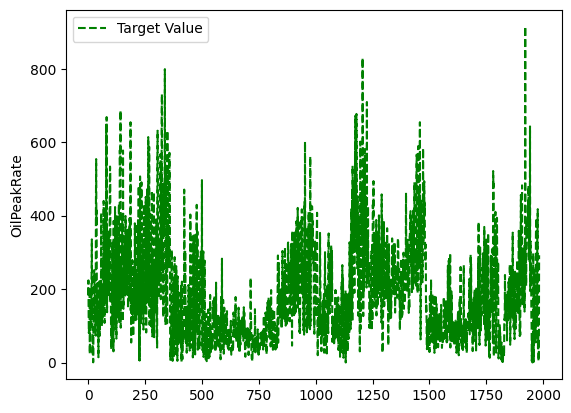

In [ ]:
datapoints = range(0,1983)
import matplotlib.pyplot as plt

plt.plot(datapoints, data_original["OilPeakRate"], '--', color='green', label='Target Value')


plt.ylabel('OilPeakRate')
plt.legend()
plt.show()

Remove the outliers

In [ ]:
Q1 = data_original["OilPeakRate"].quantile(0.25)
Q3 = data_original["OilPeakRate"].quantile(0.75)
IQR = Q3 - Q1

# identify outliers
threshold = 1.5
outliers = data_original[(data_original["OilPeakRate"] < Q1 - threshold * IQR) | (data_original["OilPeakRate"] > Q3 + threshold * IQR)]
data = data_original.drop(outliers.index)

In [ ]:
data.shape

(1943, 27)

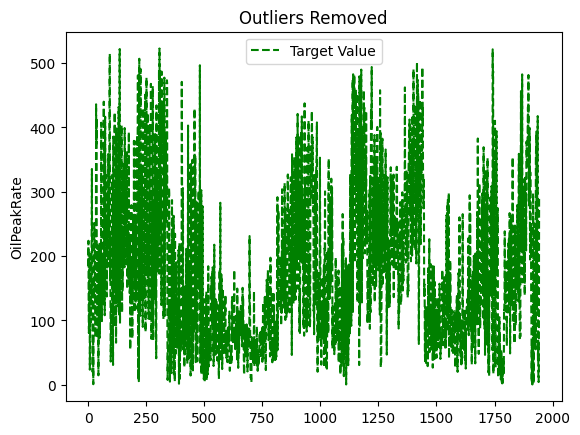

In [ ]:
datapoints = range(0,1943)
import matplotlib.pyplot as plt

plt.plot(datapoints, data["OilPeakRate"], '--', color='green', label='Target Value')

plt.title("Outliers Removed")
plt.ylabel('OilPeakRate')
plt.legend()
plt.show()

In [ ]:
data.describe()

,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,average_frac_fluid_per_stage,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
count,1.943000e+03,1.943000e+03,1.943000e+03,1.943000e+03,1943.000000,1943.000000,1.943000e+03,1.943000e+03,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1943.000000,1.943000e+03,1.943000e+03,1.943000e+03,1.943000e+03,1943.000000
mean,9.645990e+05,1.178931e+06,9.649104e+05,1.178774e+06,6376.002083,28.611940,6.554075e+05,3.337454e+06,8228.860618,98.352652,500.727565,247.786806,22154.926883,112950.473540,0.206545,5.457678,1.355121,50.607823,9.647662e+05,1.178847e+06,9.649031e+05,1.178773e+06,175.219662
std,1.534732e+05,3.561358e+05,1.534186e+05,3.558947e+05,2089.542754,13.045026,3.993848e+05,2.116615e+06,1814.101386,44.040527,230.657245,86.726372,7874.041262,41200.103857,0.072085,3.105945,0.391376,41.668974,1.534020e+05,3.560042e+05,1.534183e+05,3.558940e+05,115.073414
min,6.309095e+05,5.511906e+05,6.330213e+05,5.518347e+05,1136.811024,3.000000,1.422857e+03,2.145163e+04,2818.897638,0.421587,6.356040,99.011061,94.857143,1430.108951,0.014196,0.667970,0.000000,0.000000,6.338535e+05,5.516831e+05,6.330235e+05,5.521509e+05,0.430556
25%,8.157653e+05,8.098207e+05,8.211587e+05,8.096370e+05,4394.192913,19.000000,3.740035e+05,1.917702e+06,6851.377953,70.853171,349.520722,194.002312,17163.059830,86000.794560,0.170193,4.306717,1.000000,26.000000,8.182841e+05,8.095962e+05,8.211653e+05,8.096015e+05,82.510449
50%,9.634570e+05,1.246989e+06,9.691660e+05,1.242798e+06,6734.251969,28.000000,6.101520e+05,3.040414e+06,8523.622047,95.386437,474.390446,232.447507,21881.880950,110025.905900,0.198322,5.042311,1.500000,39.000000,9.675024e+05,1.244891e+06,9.691671e+05,1.242800e+06,146.416689
75%,1.053530e+06,1.506564e+06,1.058633e+06,1.505759e+06,7684.055118,37.000000,8.699268e+05,4.229400e+06,9432.086614,121.040433,641.490505,282.918949,26612.478605,137554.020900,0.232195,5.875677,1.500000,60.000000,1.054724e+06,1.505940e+06,1.058684e+06,1.505759e+06,252.706349
max,1.448480e+06,1.726318e+06,1.449082e+06,1.727185e+06,11129.921260,70.000000,2.411429e+06,1.387900e+07,12860.236220,347.559473,1438.590374,734.580053,67516.992480,338512.167400,1.497074,70.443998,2.500000,380.000000,1.448738e+06,1.726838e+06,1.448884e+06,1.727185e+06,522.821509


In [ ]:
corr_matrix = data.corr()
corr_matrix

<ipython-input-78-b20f780b4413>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,average_frac_fluid_per_stage,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
surface_x,1.000000,-0.556397,0.998945,-0.556391,-0.259141,-0.202655,-0.192475,-0.133009,0.278006,-0.130374,-0.068801,0.221027,-0.099692,-0.023071,-0.077757,0.092339,-0.196160,0.068761,0.999686,-0.556387,0.998939,-0.556404,0.318152
surface_y,-0.556397,1.000000,-0.551100,0.999978,0.362954,0.277257,0.090306,0.089106,-0.478898,-0.112881,-0.088490,-0.110744,-0.177365,-0.118111,-0.044036,0.005505,0.285609,-0.112317,-0.553706,0.999993,-0.551160,0.999978,-0.413188
bh_x,0.998945,-0.551100,1.000000,-0.551311,-0.256173,-0.199175,-0.193181,-0.131783,0.276193,-0.133886,-0.070217,0.220327,-0.104925,-0.025978,-0.080092,0.092070,-0.193344,0.068881,0.999776,-0.551207,0.999993,-0.551325,0.318895
bh_y,-0.556391,0.999978,-0.551311,1.000000,0.362221,0.276384,0.089852,0.088286,-0.479025,-0.112863,-0.088827,-0.110552,-0.177004,-0.118107,-0.043700,0.005256,0.284863,-0.112861,-0.553816,0.999995,-0.551370,0.999999,-0.413867
gross_perforated_length,-0.259141,0.362954,-0.256173,0.362221,1.000000,0.832655,0.745290,0.729008,0.017629,0.307802,0.300619,-0.246066,0.237261,0.230760,-0.018328,-0.039937,0.960455,0.135288,-0.257616,0.362568,-0.256128,0.362231,0.252262
number_of_stages,-0.202655,0.277257,-0.199175,0.276384,0.832655,1.000000,0.831919,0.814727,0.163053,0.543690,0.533342,-0.631129,0.209538,0.196810,-0.021119,-0.064035,0.791965,0.202694,-0.200845,0.276790,-0.199128,0.276381,0.351094
total_proppant,-0.192475,0.090306,-0.193181,0.089852,0.745290,0.831919,1.000000,0.904740,0.262766,0.820437,0.707735,-0.497981,0.654381,0.508339,0.080701,-0.193211,0.714186,0.270663,-0.192886,0.090047,-0.193111,0.089848,0.436346
total_fluid,-0.133009,0.089106,-0.131783,0.088286,0.729008,0.814727,0.904740,1.000000,0.301145,0.698697,0.826486,-0.473909,0.507139,0.663424,-0.222487,0.060995,0.703218,0.276116,-0.132397,0.088657,-0.131771,0.088281,0.454362
true_vertical_depth,0.278006,-0.478898,0.276193,-0.479025,0.017629,0.163053,0.262766,0.301145,1.000000,0.403400,0.450622,-0.287482,0.321631,0.382907,-0.093534,0.017700,0.050099,0.139781,0.277093,-0.478963,0.276261,-0.479037,0.498797
proppant_intensity,-0.130374,-0.112881,-0.133886,-0.112863,0.307802,0.543690,0.820437,0.698697,0.403400,1.000000,0.831994,-0.580369,0.824939,0.602708,0.141829,-0.263680,0.289888,0.231278,-0.132256,-0.112898,-0.133766,-0.112872,0.423941


In [ ]:
corr_matrix['OilPeakRate'].sort_values(ascending=False)

OilPeakRate                     1.000000
true_vertical_depth             0.498797
total_fluid                     0.454362
total_proppant                  0.436346
frac_fluid_intensity            0.425263
proppant_intensity              0.423941
number_of_stages                0.351094
average_proppant_per_stage      0.347150
average_frac_fluid_per_stage    0.321683
horizontal_toe_x                0.318919
bh_x                            0.318895
horizontal_midpoint_x           0.318607
surface_x                       0.318152
bin_lateral_length              0.283393
gross_perforated_length         0.252262
frac_seasoning                  0.147108
proppant_to_frac_fluid_ratio   -0.002315
frac_fluid_to_proppant_ratio   -0.026806
average_stage_length           -0.242174
surface_y                      -0.413188
horizontal_midpoint_y          -0.413550
bh_y                           -0.413867
horizontal_toe_y               -0.413877
Name: OilPeakRate, dtype: float64

Deal with the category values

In [ ]:
from sklearn.preprocessing import OneHotEncoder
categorical_cols = ['ffs_frac_type', 'relative_well_position', 'batch_frac_classification', 'well_family_relationship']
data_cat = data_original[categorical_cols]
cat_encoder = OneHotEncoder()
data_category_val = cat_encoder.fit_transform(data_cat).toarray()
data_hot_encoded = pd.DataFrame(data_category_val, index=data_original.index)
data_other_cols = data_original.drop(columns=categorical_cols)
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [ ]:
data_out.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,surface_x,surface_y,bh_x,bh_y,gross_perforated_length,number_of_stages,total_proppant,total_fluid,true_vertical_depth,proppant_intensity,frac_fluid_intensity,average_stage_length,average_proppant_per_stage,average_frac_fluid_per_stage,proppant_to_frac_fluid_ratio,frac_fluid_to_proppant_ratio,bin_lateral_length,frac_seasoning,horizontal_midpoint_x,horizontal_midpoint_y,horizontal_toe_x,horizontal_toe_y,OilPeakRate
count,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.00000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03,1.983000e+03,1.983000e+03,1.983000e+03,1983.000000,1983.000000,1.983000e+03,1.983000e+03,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1983.000000,1.983000e+03,1.983000e+03,1.983000e+03,1.983000e+03,1983.000000
mean,0.064044,0.008069,0.267776,0.258699,0.308119,0.093293,0.28593,0.316692,0.390822,0.006556,0.332829,0.207766,0.452849,0.006556,0.184569,0.418053,0.390822,0.006556,9.659894e+05,1.172593e+06,9.663066e+05,1.172432e+06,6388.115021,28.739788,6.634347e+05,3.372470e+06,8263.638566,99.449718,505.792397,246.929571,22334.100645,113720.315828,0.206925,5.452839,1.358296,50.517902,9.661610e+05,1.172505e+06,9.663019e+05,1.172430e+06,184.311208
std,0.244894,0.089485,0.442912,0.438030,0.461832,0.290916,0.45197,0.465303,0.488058,0.080722,0.471345,0.405811,0.497897,0.080722,0.388045,0.493363,0.488058,0.080722,1.526118e+05,3.566799e+05,1.525667e+05,3.564460e+05,2097.287006,13.066772,4.030238e+05,2.128575e+06,1828.670085,44.544372,233.805188,86.275210,7991.700193,41855.918520,0.072687,3.109200,0.393041,41.486501,1.525458e+05,3.565537e+05,1.525671e+05,3.564474e+05,130.878111
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.309095e+05,5.511906e+05,6.330213e+05,5.518347e+05,1136.811024,3.000000,1.422857e+03,2.145163e+04,2818.897638,0.421587,6.356040,99.011061,94.857143,1430.108951,0.014196,0.667970,0.000000,0.000000,6.338535e+05,5.516831e+05,6.330235e+05,5.521509e+05,0.430556
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.165262e+05,8.088458e+05,8.214843e+05,8.089644e+05,4392.716535,19.000000,3.827313e+05,1.928312e+06,6881.889764,71.510878,351.795023,193.773065,17370.129935,86378.123400,0.170563,4.304857,1.000000,26.000000,8.193051e+05,8.090177e+05,8.215293e+05,8.088567e+05,83.549333
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.734531e+05,1.236962e+06,9.713567e+05,1.238601e+06,6719.488189,28.000000,6.140491e+05,3.074232e+06,8556.102362,95.938182,476.781384,232.072553,21995.660710,110425.235900,0.198422,5.039754,1.500000,39.000000,9.730340e+05,1.237191e+06,9.712851e+05,1.238187e+06,149.500023
75%,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.053916e+06,1.498222e+06,1.058633e+06,1.498523e+06,7699.311024,37.000000,8.750872e+05,4.282250e+06,9445.374016,122.759534,649.220118,282.480315,26771.787055,138343.931450,0.232296,5.862951,1.500000,60.000000,1.054724e+06,1.497986e+06,1.058684e+06,1.498523e+06,260.526197
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.448480e+06,1.726318e+06,1.449082e+06,1.727185e+06,11129.921260,70.000000,2.411429e+06,1.387900e+07,12860.236220,347.559473,1589.796799,734.580053,67516.992480,338512.167400,1.497074,70.443998,2.500000,380.000000,1.448738e+06,1.726838e+06,1.448884e+06,1.727185e+06,

In [ ]:
data_out.shape

(1983, 41)

In [ ]:
data_out.to_csv('/content/GoogleDrive/MyDrive/data/data6.csv')

In [ ]:
X = data_out.drop("OilPeakRate", axis=1).copy()
y = data_out["OilPeakRate"].copy()

In [ ]:
from sklearn.model_selection import train_test_split

train_i, test_i, train_i_labels, test_i_labels = train_test_split(X, y, test_size=0.33, random_state=42)

In [ ]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
train_i.columns = train_i.columns.astype(str)
test_i.columns = test_i.columns.astype(str)
train_i_scaled = std_scaler.fit_transform(train_i)
test_i_scaled = std_scaler.fit_transform(test_i)

In [ ]:
def accuracy(data_labels, y_pred):
  count = 0
  for i in range(len(y_pred)):
    if y_pred[i] >= data_labels[i] * 0.9 and y_pred[i] <= data_labels[i] * 1.1:
      count += 1
  return count/len(y_pred)

  Linear Model

In [ ]:
def Z_score(X_train, y_true, y_pred, beta_hat):
    '''
    Returns the Z-scores of the model with coefficients beta_hat.
    The data is encoded in X_train and y_true:
        X_train is a (numpy) array (N, p + 1), where p is the number of predictors.
        y_true is a vector of length N.
    y_pred ia vector of length N, and is the prediction of the model on X.
    '''
    N = len(y_true)
    p = X_train.shape[1] - 1
    variance_y_est = (1/(N-p-1)) * np.sum(np.square(y_true - y_pred)) # Estimative of the variance of y.
    diag = np.diag(np.linalg.inv(np.matmul(np.transpose(X_train),X_train))) # Diagonal of (X^t X)^{-1}.
    Z = (1/np.sqrt(variance_y_est)) * np.multiply(beta_hat, np.sqrt(1/diag))
    return Z

In [ ]:
import numpy as np

In [ ]:
X1 = data_other_cols.drop("OilPeakRate", axis=1).copy()
y1 = data_other_cols["OilPeakRate"].copy()

In [ ]:
from sklearn.model_selection import train_test_split

train1_i, test1_i, train1_i_labels, test1_i_labels = train_test_split(X1, y1, test_size=0.33, random_state=42)

Check the importance of each feature in the linear regression model, and the feature is significant if its Z-score>2.

In [ ]:
from sklearn.metrics import mean_squared_error
test_accuracy = []
train_accuracy = []
mse = []
for i in range(5):
  from sklearn.linear_model import LinearRegression
  lin_reg = LinearRegression()
  lin_reg.fit(train1_i, train1_i_labels)
  test_predictions = lin_reg.predict(test1_i)
  train_prediction = lin_reg.predict(train1_i)
  print("fold", i)
  print("test_accuracy", accuracy(test1_i_labels.to_list(), np.array(test_predictions)))
  test_accuracy.append(accuracy(test1_i_labels.to_list(), np.array(test_predictions)))
  print("train_accuracy", accuracy(train1_i_labels.to_list(), np.array(train_prediction)))
  train_accuracy.append(accuracy(train1_i_labels.to_list(), np.array(train_prediction)))
  print("mse is ", mean_squared_error(train1_i_labels, train_prediction, squared=False))
  mse.append(mean_squared_error(train1_i_labels, train_prediction, squared=False))
      # The predicted values of y on the training set.
  y_pred = lin_reg.predict(train1_i)

  # prepare beta
  beta_hat = lin_reg.coef_
  beta_hat = np.concatenate([np.array([lin_reg.intercept_]), beta_hat])

  # prepare X
  column_of_ones = np.ones((train_i.shape[0],1))
  X = np.concatenate([column_of_ones, train1_i], axis = 1)

  # Z-scores
  columns = ['Intercept'] + train1_i.columns.to_list()
  Zscores = np.array([Z_score(X, train1_i_labels.to_numpy(), y_pred, beta_hat)])
  Zscores_df = pd.DataFrame(data=Zscores, columns=columns, index=['Z-score'] )
  pd.set_option('display.max_columns', None)
  print(Zscores_df)

print("average test_accuracy", sum(test_accuracy)/ len(test_accuracy))
print("average train_accuracy", sum(train_accuracy)/ len(train_accuracy))
print("mse", sum(mse)/ len(mse))

fold 0
test_accuracy 0.1618320610687023
train_accuracy 0.15135542168674698
mse is  94.43808331519516
         Intercept  surface_x  surface_y      bh_x      bh_y  \
Z-score  -4.078597   0.788637  -0.274706 -0.409705  0.218356   

         gross_perforated_length  number_of_stages  total_proppant  \
Z-score                -0.222927          1.200582       -0.123334   

         total_fluid  true_vertical_depth  proppant_intensity  \
Z-score     0.946566             6.839836           -1.558359   

         frac_fluid_intensity  average_stage_length  \
Z-score               1.87512             -1.393089   

         average_proppant_per_stage  average_frac_fluid_per_stage  \
Z-score                    3.906428                     -2.947966   

         proppant_to_frac_fluid_ratio  frac_fluid_to_proppant_ratio  \
Z-score                      2.019665                      3.175382   

         bin_lateral_length  frac_seasoning  horizontal_midpoint_x  \
Z-score            2.131075       -

In [ ]:
from sklearn.metrics import mean_squared_error
import numpy as np
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(train_i, train_i_labels)
test_predictions = lin_reg.predict(test_i)
train_prediction = lin_reg.predict(train_i)
print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.14156626506024098
test_accuracy 0.15877862595419848
mse_train is  92.55233734308322
mse_test is  93.56331159229124


Decision Tree model

In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(train_i, train_i_labels)
test_predictions = tree_reg.predict(test_i)
train_prediction = tree_reg.predict(train_i)
print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 1.0
test_accuracy 0.18625954198473282
mse_train is  0.0
mse_test is  108.0961867668526


Decision model 1

In [ ]:
tree_reg = DecisionTreeRegressor(max_depth=5, random_state=42)
tree_reg.fit(train_i, train_i_labels)
test_predictions = tree_reg.predict(test_i)
train_prediction = tree_reg.predict(train_i)
print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.19503012048192772
test_accuracy 0.166412213740458
mse_train is  82.98270341387298
mse_test is  90.65329773031175


Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor
forest_reg = RandomForestRegressor(n_estimators=250, random_state=42)
forest_reg.fit(train_i, train_i_labels)
test_predictions = forest_reg.predict(test_i)
train_prediction = forest_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.5128012048192772
test_accuracy 0.24427480916030533
mse_train is  29.472402128288252
mse_test is  74.74176737684031


RandomForest Model2

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=500, n_jobs=-1, random_state=42)
forest_reg.fit(train_i, train_i_labels)
test_predictions = forest_reg.predict(test_i)
train_prediction = forest_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.5060240963855421
test_accuracy 0.2366412213740458
mse_train is  29.412613478322623
mse_test is  74.47187280859944


In [ ]:
for score, name in zip(forest_reg.feature_importances_, train_i.columns):
  print(round(score,2), name)

0.0 0
0.0 1
0.0 2
0.01 3
0.01 4
0.0 5
0.0 6
0.0 7
0.0 8
0.0 9
0.0 10
0.0 11
0.0 12
0.0 13
0.0 14
0.0 15
0.0 16
0.0 17
0.02 surface_x
0.11 surface_y
0.02 bh_x
0.05 bh_y
0.04 gross_perforated_length
0.03 number_of_stages
0.15 total_proppant
0.04 total_fluid
0.19 true_vertical_depth
0.04 proppant_intensity
0.02 frac_fluid_intensity
0.02 average_stage_length
0.02 average_proppant_per_stage
0.02 average_frac_fluid_per_stage
0.02 proppant_to_frac_fluid_ratio
0.02 frac_fluid_to_proppant_ratio
0.0 bin_lateral_length
0.03 frac_seasoning
0.02 horizontal_midpoint_x
0.04 horizontal_midpoint_y
0.02 horizontal_toe_x
0.05 horizontal_toe_y


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [
{'n_estimators': [300, 500, 1000], 'max_features': [5, 10, 15, 20]},
{'bootstrap': [False], 'n_estimators': [300, 1000], 'max_features': [10, 15, 20]},
]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
scoring='neg_root_mean_squared_error',
return_train_score=True)
grid_search.fit(train_i, train_i_labels)

GridSearchCV(cv=5, estimator=RandomForestRegressor(),
             param_grid=[{'max_features': [5, 10, 15, 20],
                          'n_estimators': [300, 500, 1000]},
                         {'bootstrap': [False], 'max_features': [10, 15, 20],
                          'n_estimators': [300, 1000]}],
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [ ]:
grid_search.best_params_

{'max_features': 5, 'n_estimators': 300}

random Forest Model 3

In [ ]:
forest_reg = RandomForestRegressor(n_estimators=300, max_features=5, n_jobs=-1, random_state=42)
forest_reg.fit(train_i, train_i_labels)
test_predictions = forest_reg.predict(test_i)
train_prediction = forest_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.5037650602409639
test_accuracy 0.24122137404580152
mse_train is  29.231925960701904
mse_test is  74.15104078811048


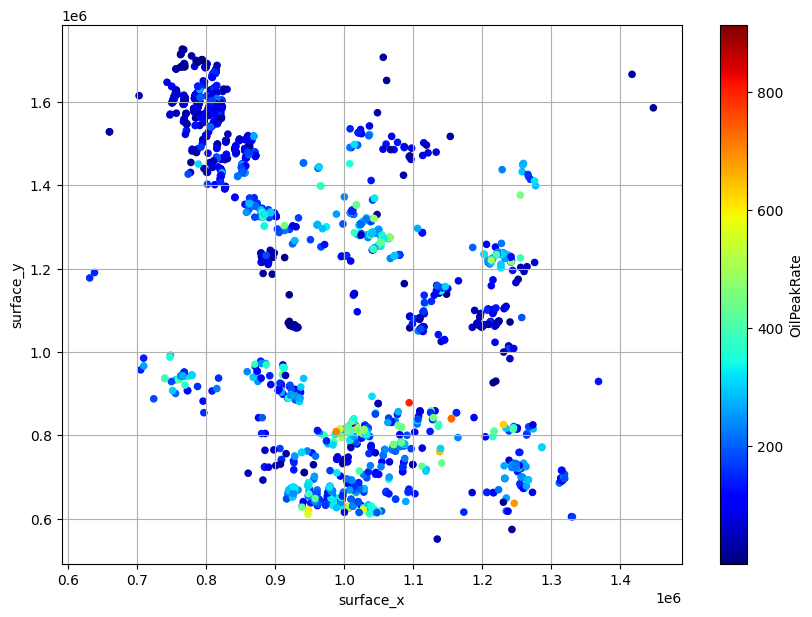

In [ ]:
data_out.plot(kind='scatter', x='surface_x', y='surface_y', grid=True, c="OilPeakRate", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
plt.show()

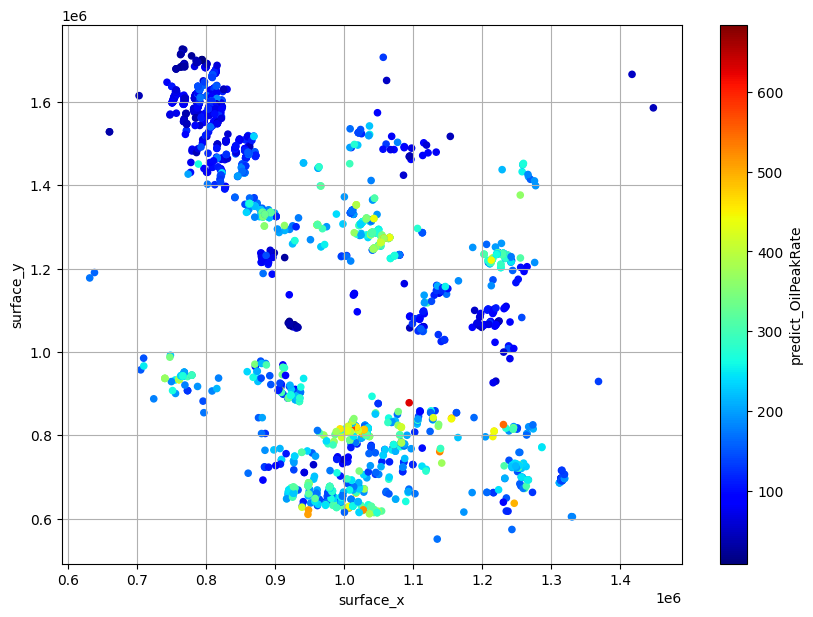

In [ ]:
data_out.columns = data_out.columns.astype(str)
data_out["predict_OilPeakRate"] = forest_reg.predict(data_out.drop("OilPeakRate", axis=1).copy())
data_out.plot(kind='scatter', x='surface_x', y='surface_y', grid=True, c="predict_OilPeakRate", cmap="jet", colorbar=True, legend=True, sharex=False, figsize=(10, 7))
plt.show()

KNN model

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
KNN_reg = KNeighborsRegressor(n_neighbors=10)
KNN_reg.fit(train_i, train_i_labels)
test_predictions = KNN_reg.predict(test_i)
train_prediction = KNN_reg.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.19653614457831325
test_accuracy 0.18167938931297709
mse_train is  83.88689882377192
mse_test is  85.4355596489615


Voting Regression

In [ ]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
voting_clf = VotingRegressor(
estimators=[('lr', LinearRegression()),
            ('rf', RandomForestRegressor(n_estimators=1000, max_features=5, n_jobs=-1, random_state=42)),
            ('dt', DecisionTreeRegressor(max_depth=5, random_state=42)),
            ('knn', KNeighborsRegressor(n_neighbors=10)),
             ('svr', SVR())],
)
voting_clf.fit(train_i, train_i_labels)

VotingRegressor(estimators=[('lr', LinearRegression()),
                            ('rf',
                             RandomForestRegressor(max_features=5,
                                                   n_estimators=1000, n_jobs=-1,
                                                   random_state=42)),
                            ('dt',
                             DecisionTreeRegressor(max_depth=5,
                                                   random_state=42)),
                            ('knn', KNeighborsRegressor(n_neighbors=10)),
                            ('svr', SVR())])

In [ ]:
test_predictions = voting_clf.predict(test_i)
train_prediction = voting_clf.predict(train_i)

print("train_accuracy", accuracy(train_i_labels.to_list(), np.array(train_prediction)))
print("test_accuracy", accuracy(test_i_labels.to_list(), np.array(test_predictions)))
mse_train_i = mean_squared_error(train_i_labels, train_prediction, squared=False)
mse_test_i = mean_squared_error(test_i_labels, test_predictions, squared=False)
print("mse_train is ", mse_train_i)
print("mse_test is ", mse_test_i)

train_accuracy 0.19503012048192772
test_accuracy 0.16793893129770993
mse_train is  74.05156557232198
mse_test is  83.65554196822455


Neural Network

In [ ]:
train_i_scaled_copy = train_i_scaled.copy()
test_i_scaled_copy = test_i_scaled.copy()

In [ ]:
column_name = list(data_out.drop(["OilPeakRate", "predict_OilPeakRate"], axis=1).copy().columns)
train_i_scaled = pd.DataFrame(train_i_scaled, columns=column_name)
test_i_scaled = pd.DataFrame(test_i_scaled, columns=column_name)

In [ ]:
train_i.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1328 entries, 22363 to 13398
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   0                             1328 non-null   float64
 1   1                             1328 non-null   float64
 2   2                             1328 non-null   float64
 3   3                             1328 non-null   float64
 4   4                             1328 non-null   float64
 5   5                             1328 non-null   float64
 6   6                             1328 non-null   float64
 7   7                             1328 non-null   float64
 8   8                             1328 non-null   float64
 9   9                             1328 non-null   float64
 10  10                            1328 non-null   float64
 11  11                            1328 non-null   float64
 12  12                            1328 non-null   float64
 13

In [ ]:
import sklearn.model_selection as ms
import tensorflow as tf
from tensorflow import keras
from keras import layers
%matplotlib inline

In [ ]:
initializer = tf.keras.initializers.HeUniform(seed=42)
model = keras.Sequential([
               keras.Input(shape=(40,)),
               layers.Dense(10, activation="relu", kernel_initializer=initializer),
               layers.Dense(10, activation="relu", kernel_initializer=initializer),
               layers.Dense(1, activation="linear", kernel_initializer=initializer)])
adam = keras.optimizers.Adam(learning_rate=0.0001)
model.compile(optimizer='adam',
              loss="mse",
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
print('------------------------------------------------------------------------')

history = model.fit(train_i_scaled, train_i_labels, epochs=200, batch_size=100)
# Generate generalization metrics
scores_test = model.evaluate(test_i_scaled, test_i_labels, verbose=0)
scores_train = model.evaluate(train_i_scaled, train_i_labels, verbose=0)
print(f'> - rmse_train: {scores_train[1]} - rmse_test: {scores_test[1]}')
test_predictions = model.predict(test_i_scaled).reshape((-1,)).tolist()
train_prediction = model.predict(train_i_scaled).reshape((-1,)).tolist()
acc_test = accuracy(test_i_labels.to_list(), np.array(test_predictions))
acc_train = accuracy(train_i_labels.to_list(), np.array(train_prediction))
print(f'> - train_accuracy: {acc_train} - test_accuracy: {acc_test}')

------------------------------------------------------------------------
Epoch 1/200
14/14 [==============================] - 3s 5ms/step - loss: 50348.2891 - root_mean_squared_error: 224.3842
Epoch 2/200
14/14 [==============================] - 0s 4ms/step - loss: 50190.7109 - root_mean_squared_error: 224.0328
Epoch 3/200
14/14 [==============================] - 0s 3ms/step - loss: 50053.4648 - root_mean_squared_error: 223.7263
Epoch 4/200
14/14 [==============================] - 0s 4ms/step - loss: 49916.9492 - root_mean_squared_error: 223.4210
Epoch 5/200
14/14 [==============================] - 0s 4ms/step - loss: 49764.6641 - root_mean_squared_error: 223.0800
Epoch 6/200
14/14 [==============================] - 0s 3ms/step - loss: 49588.7422 - root_mean_squared_error: 222.6853
Epoch 7/200
14/14 [==============================] - 0s 4ms/step - loss: 49374.9258 - root_mean_squared_error: 222.2047
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 49123.1172 - r

In [ ]:
def build_model(hp):
 n_hidden = hp.Int("n_hidden", min_value=0, max_value=8, default=2)
 n_neurons = hp.Int("n_neurons", min_value=5, max_value=40)
 learning_rate = hp.Float("learning_rate", min_value=5e-5, max_value=5e-4, sampling='log')
 optimizer = hp.Choice("optimizer", values=['sgd', 'adam'])
 if optimizer == 'sgd':
  optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
 else:
  optimizer = keras.optimizers.Adam(learning_rate=learning_rate)

 model = keras.models.Sequential()
 for _ in range(n_hidden):
  model.add(layers.Dense(n_neurons, activation="relu"))
 model.add(layers.Dense(1, activation="linear"))
 model.compile(loss="mse", optimizer=optimizer, metrics=[tf.keras.metrics.RootMeanSquaredError()])
 return model

In [ ]:
X_train, X_valid, y_train, y_valid = train_test_split(train_i_scaled, train_i_labels, test_size=0.3, random_state=42)

In [ ]:
pip install keras-tuner --upgrade

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 128.9/128.9 kB 1.9 MB/s eta 0:00:00


In [ ]:
import keras_tuner as kt
random_search_tuner = kt.RandomSearch(
    build_model, objective=kt.Objective('val_root_mean_squared_error', direction='min'), max_trials=5, overwrite=True, directory="chevron_projection", project_name="my_rnd_search", seed=42
)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 00m 07s]
val_root_mean_squared_error: 175.8448486328125

Best val_root_mean_squared_error So Far: 131.81515502929688
Total elapsed time: 00h 00m 40s


In [ ]:
top3_params = random_search_tuner.get_best_models(num_models=3)
best_model = top3_params[0]

In [ ]:
top3_params = random_search_tuner.get_best_hyperparameters(num_trials=3)
top3_params[0].values

{'n_hidden': 5,
 'n_neurons': 6,
 'learning_rate': 0.00012808724469969785,
 'optimizer': 'sgd'}

In [ ]:
history = best_model.fit(train_i_scaled, train_i_labels, epochs=200, batch_size=100)
# Generate generalization metrics
scores_test = model.evaluate(test_i_scaled, test_i_labels, verbose=0)
scores_train = model.evaluate(train_i_scaled, train_i_labels, verbose=0)
print(f'> - rmse_train: {scores_train[1]} - rmse_test: {scores_test[1]}')
test_predictions = model.predict(test_i_scaled).reshape((-1,)).tolist()
train_prediction = model.predict(train_i_scaled).reshape((-1,)).tolist()
acc_test = accuracy(test_i_labels.to_list(), np.array(test_predictions))
acc_train = accuracy(train_i_labels.to_list(), np.array(train_prediction))
print(f'> - train_accuracy: {acc_train} - test_accuracy: {acc_test}')

Epoch 1/200
14/14 [==============================] - 1s 3ms/step - loss: 17277.7930 - root_mean_squared_error: 131.4450
Epoch 2/200
14/14 [==============================] - 0s 2ms/step - loss: 17262.6699 - root_mean_squared_error: 131.3875
Epoch 3/200
14/14 [==============================] - 0s 2ms/step - loss: 17258.1211 - root_mean_squared_error: 131.3702
Epoch 4/200
14/14 [==============================] - 0s 2ms/step - loss: 17256.5703 - root_mean_squared_error: 131.3643
Epoch 5/200
14/14 [==============================] - 0s 2ms/step - loss: 17255.5801 - root_mean_squared_error: 131.3605
Epoch 6/200
14/14 [==============================] - 0s 2ms/step - loss: 17263.1387 - root_mean_squared_error: 131.3893
Epoch 7/200
14/14 [==============================] - 0s 2ms/step - loss: 17259.8301 - root_mean_squared_error: 131.3767
Epoch 8/200
14/14 [==============================] - 0s 3ms/step - loss: 17255.9434 - root_mean_squared_error: 131.3619
Epoch 9/200
14/14 [=====================